<a href="https://colab.research.google.com/github/robert-marik/apl-slidy/blob/master/Ansys_podminky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Podmínky potřebné pro rozjetí výpočtu v ANSYS

Označení: $\sigma_{+x}$,  $\sigma_{-x}$, $\sigma_{+y}$,  $\sigma_{-y}$,  $\sigma_{+z}$ a  $\sigma_{-z}$ jsou tahový a tlakový yield stress po řadě v L, R a T směru.

## Podmínka konzistence

ANSYS manuál, rovnice (4-83) tvrdí, že musí platit 
$$
\frac{\sigma_{+x}-\sigma_{-x}}{\sigma_{+x}\sigma_{-x}} 
+
\frac{\sigma_{+y}-\sigma_{-y}}{\sigma_{+y}\sigma_{-y}} 
+
\frac{\sigma_{+z}-\sigma_{-z}}{\sigma_{+z}\sigma_{-z}} 
=0,
$$
tj. (rozdělit každý zlomek na dva a pokrátit)
$$
\frac1{\sigma_{+x}}+\frac1{\sigma_{+y}}+\frac1{\sigma_{+z}}
-\left(
\frac1{\sigma_{-x}}+\frac1{\sigma_{-y}}+\frac1{\sigma_{-z}}\right)=0.
$$
Funkce $\frac 1x$ se mění pomalu pro velké $x$ a rychle pro malé $x$, ať již uvažujeme absolutní nebo relativní změnu. Derivace a derivace podělené hodnotou jsou totiž $-\frac 1{x^2}$ a $-\frac 1x$ a jsou tedy  malé pro velké $x$ a naopak. Dá se tedy učekávat, že podmínku budou hodně narušovat malé hodnoty a naopak že na splnění podmínky nebudou mít prakticky vliv velké hodnoty.
Podmínku je možno psát ve tvaru 
$$
\frac 3{\frac1{\sigma_{+x}}+\frac1{\sigma_{+y}}+\frac1{\sigma_{+z}}}
=\frac 3{\frac1{\sigma_{-x}}+\frac1{\sigma_{-y}}+\frac1{\sigma_{-z}}}
$$
a tato podmnka říká, že harmonický průměr tahových yieldů musí být stejný jako harmonický průměr tlakových yeildů. 

K harmonickému prlměru: je to z rodiny arimetický průměr, geometrický průměr a harmonický průměr. Hodnota mezi maximem a minimem. Chová se třošku jinak než jiné průměry.





## Closet yield surface

ANSYS strana 94 podmínka (4-84) je v podstatě (volím jenom $K=1$ v (4-76) a ne $M_{11}=1$ jako v Ansys manuálu)
$$ 
\frac{1}{\sigma_{+x}^2\sigma_{-x}^2}
+
\frac{1}{\sigma_{+y}^2\sigma_{-y}^2}
+
\frac{1}{\sigma_{+z}^2\sigma_{-z}^2}
-
2\left( 
\frac{1}{\sigma_{+x}\sigma_{-x}}\cdot \frac{1}{\sigma_{+y}\sigma_{-y}}
+
\frac{1}{\sigma_{+y}\sigma_{-y}}\cdot \frac{1}{\sigma_{+z}\sigma_{-z}}
+
\frac{1}{\sigma_{+x}\sigma_{-x}}\cdot \frac{1}{\sigma_{+z}\sigma_{-z}}
  \right)<0.
$$
Pro $X=\frac{1}{\sigma_{+x}\sigma_{-x}}$, 
$Y=\frac{1}{\sigma_{+y}\sigma_{-y}}$, 
$Z=\frac{1}{\sigma_{+z}\sigma_{-z}}$
máme vnějšek kuželové plochy 
$$ X^2+Y^2+Z^2 - 2(XY+YZ+XZ) < 0$$
Pokud je  $X=0$ dostáváme 
$$Y^2+Z^2-2YZ=(Y-Z)^2<0.$$
Pro $X$ malé musíme díky spojitosti mít podobně $$ (Y-Z)^2$$ malé. Tedy pokud jsou yieldy v L velké ve srovnání s moduly v dalších směrech (RM: asi jsou, ne?), musí ty yieldy v dalších směrech být blízko sebe ve smyslu $$ \sigma_{+y}\sigma_{-y}\approx \sigma_{+z}\sigma_{-z}.$$

In [7]:
import numpy as np

A = np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])
np.linalg.eig(A)

(array([-1.,  2.,  2.]), array([[ 0.57735027, -0.81649658,  0.42755853],
        [ 0.57735027,  0.40824829, -0.81618716],
        [ 0.57735027,  0.40824829,  0.38862863]]))

Graf: [klikni](https://www.wolframalpha.com/input/?i=plot+x%5E2%2By%5E2%2Bz%5E2+-+2+%28x*y%2By*z%2Bx*z%29+%3D+0)

Vlastní čísla: [klikni](https://www.wolframalpha.com/input/?i=eigenvalues+%7B%7B1%2C-1%2C-1%7D%2C%7B-1%2C1%2C-1%7D%2C%7B-1%2C-1%2C1%7D%7D)

In [9]:
P=np.array([[-1/np.sqrt(2),0,1/np.sqrt(2)],[-1/np.sqrt(2),1/np.sqrt(2),0],[1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]])
P

array([[-0.70710678,  0.        ,  0.70710678],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.57735027,  0.57735027,  0.57735027]])

In [14]:
np.matmul(P,P.transpose())

array([[1.00000000e+00, 5.00000000e-01, 1.77961928e-17],
       [5.00000000e-01, 1.00000000e+00, 1.77961928e-17],
       [1.77961928e-17, 1.77961928e-17, 1.00000000e+00]])

In [30]:
def f(X,Y,Z):
  return ( X**2 + Y**2 + Z**2 - 2*(X*Y+Y*Z+X*Z))


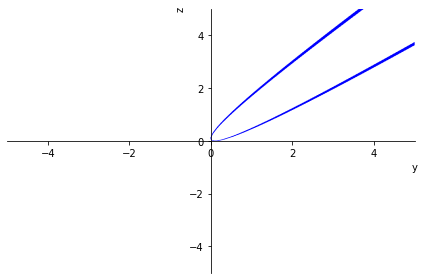

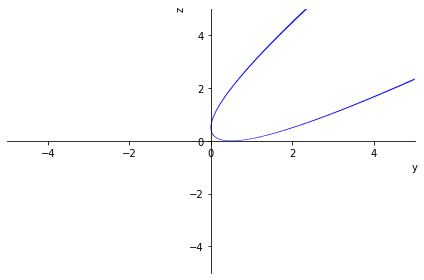

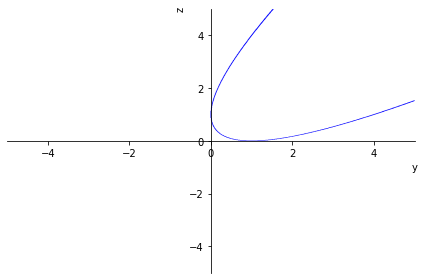

In [31]:
from sympy import plot_implicit, symbols, Eq, And
y, z = symbols('y z')
plot_implicit(Eq(f(0.1,y,z), 0))
plot_implicit(Eq(f(0.5,y,z), 0))
plot_implicit(Eq(f(1,y,z), 0))

In [25]:
# https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


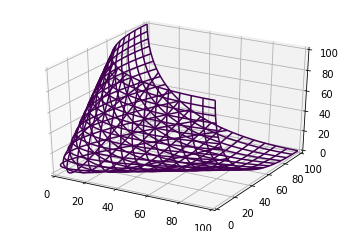

In [27]:
plot_implicit(f, bbox=(0.,100.))